In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=pd.read_csv("project2.csv")

In [10]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [12]:
data.shape

(1453, 15)

In [13]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [14]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [15]:
data["Gender"].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

In [16]:
data["VisitFrequency"].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [17]:
data["Like"].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

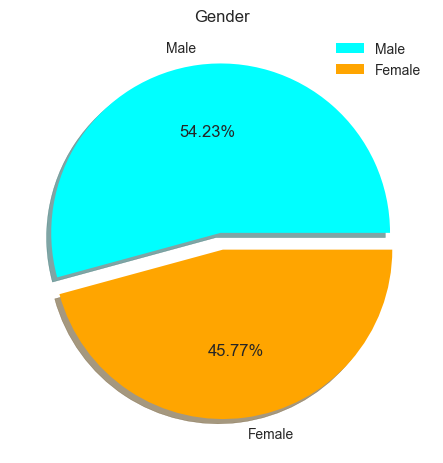

In [18]:
labels = ['Male','Female']
sizes = data['Gender'].value_counts()
colors = ['cyan','orange']
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender')
plt.axis('off')
plt.legend()
plt.show()

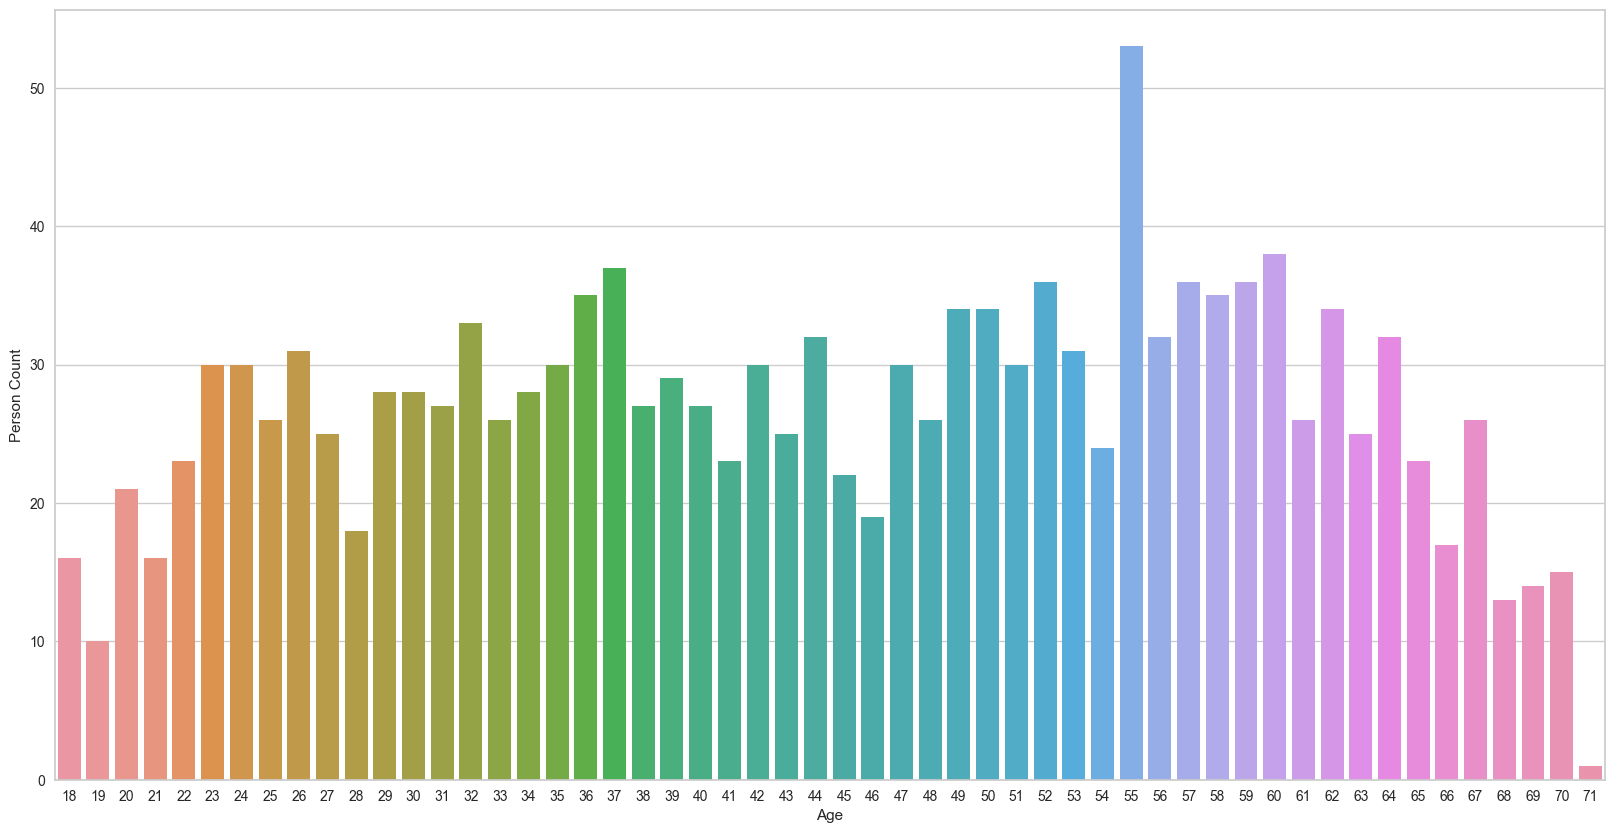

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["Age"])
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

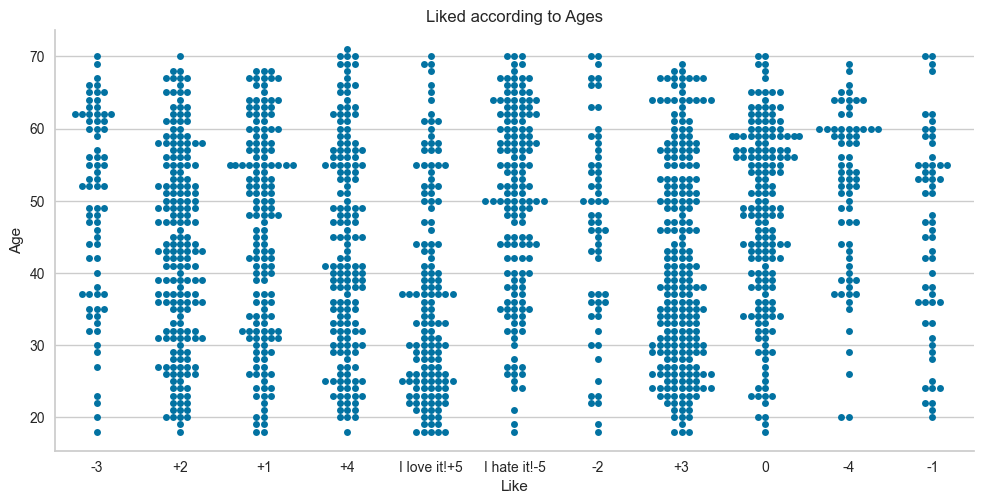

In [20]:
sns.catplot(x="Like", y="Age",data=data, orient="v", height=5, aspect=2, kind="swarm")
plt.title('Liked according to Ages')
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.metaestimators import available_if
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

C:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

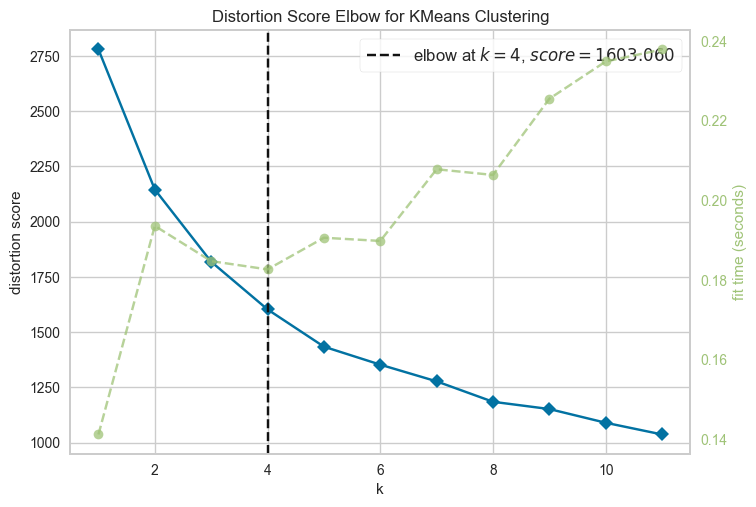

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
datacat = data.loc[:,cat]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(datacat)
visualizer.show()

In [47]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data['cluster_num'] = kmeans.labels_

C:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(data['cluster_num'],data['Like'])
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab 

Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


<Axes: xlabel='cluster_num', ylabel='Age'>

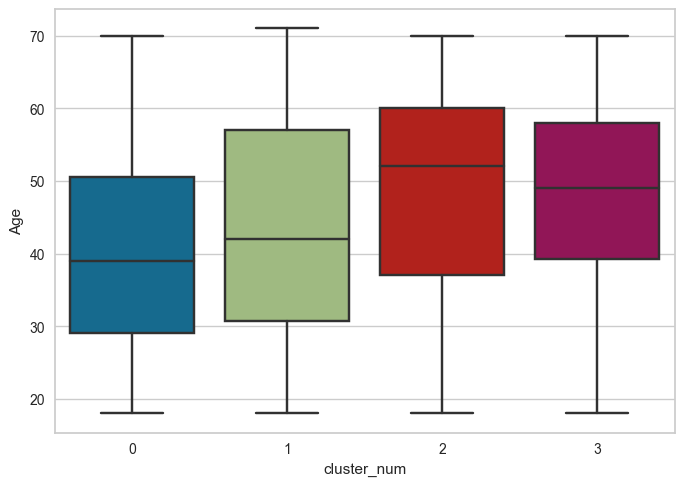

In [54]:
sns.boxplot(x="cluster_num", y="Age", data=data)

In [57]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
vf = data.groupby('cluster_num')['VisitFrequency'].mean()
vf

cluster_num
0    2.547988
1    2.584483
2    2.822368
3    2.654472
Name: VisitFrequency, dtype: float64

In [58]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
like = data.groupby('cluster_num')['Like'].mean()
# like = Like.to_frame().reset_index()
like

cluster_num
0    3.798762
1    3.794828
2    5.430921
3    6.739837
Name: Like, dtype: float64

In [60]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
gender = data.groupby('cluster_num')['Gender'].mean()
gender

cluster_num
0    0.523220
1    0.398276
2    0.411184
3    0.569106
Name: Gender, dtype: float64

In [65]:
finalval=gender.to_frame().merge(like, on='cluster_num', how='left').merge(vf, on='cluster_num', how='left')
finalval

,Gender,Like,VisitFrequency
cluster_num,,,
0,0.523220,3.798762,2.547988
1,0.398276,3.794828,2.584483
2,0.411184,5.430921,2.822368
3,0.569106,6.739837,2.654472


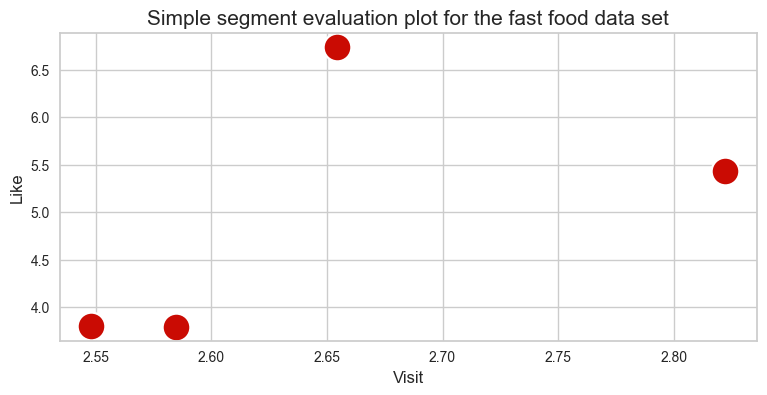

In [67]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=finalval,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()